<a href="https://colab.research.google.com/github/MikeChastain84/Mike_INFO5731_Fall2024/blob/main/Chastain_Mike_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [3]:
# Write your code here

# Import all libraries, download necessary resources, and load DataFrames
import pandas as pd
from sklearn import metrics


# Specify file paths for the train and test datasets.
train_file = '/content/drive/MyDrive/Colab Notebooks/INFO 5731/Week 13/stsa-train.txt'
test_file = '/content/drive/MyDrive/Colab Notebooks/INFO 5731/Week 13/stsa-test.txt'

# Define a function to load the data from the text files into a DataFrame
# Each line in the text file is expected to have a label and review text
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            label, text = line[0], line[2:].strip()  # Extract label and text
            data.append((int(label), text))
    return pd.DataFrame(data, columns=['label', 'text'])

# Load train and test datasets
train_df = load_data(train_file)
test_df = load_data(test_file)

# Display dataframe samples:
print('\nTrain Data Sample:')
print(train_df.head())
print('\nTest Data Sample:')
print(test_df.head())


Train Data Sample:
   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...

Test Data Sample:
   label                                               text
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    train_df['text'],   # Features: review texts
    train_df['label'],  # Labels: sentiment labels (0 or 1)
    test_size=0.2,      # Use 20% for validation
    random_state=42     # Ensure reproducibility
)

# Display the sizes of the split datasets
print(f'Training Data Size: {len(X_train)}')
print(f'Validation Data Size: {len(X_val)}')

Training Data Size: 5536
Validation Data Size: 1384


### Multinomial Naive Bayes

In [5]:
import re
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline

nltk.download('stopwords')

# Initialize PorterStemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a preprocessing function
def preprocess_text(text):
    """Preprocess text by removing punctuation, lowercasing, and stemming."""
    text = re.sub(r'\W+', ' ', str(text))  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the training and validation sets
X_train = X_train.apply(preprocess_text)
X_val = X_val.apply(preprocess_text)

# Create a Pipeline for TF-IDF and Multinomial Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF Vectorization
    ('clf', MultinomialNB()),  # Multinomial Naive Bayes Classifier
])

# Perform 10 fold cross validation:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

# Train the Model on Training Data
pipeline.fit(X_train, y_train)

# Evaluate the Model on the Validation Data
y_val_pred = pipeline.predict(X_val)

# Print classification report
print("\nClassification Report:")
print(metrics.classification_report(y_val, y_val_pred))

# Print validation accuracy
print(f"Validation Accuracy: {metrics.accuracy_score(y_val, y_val_pred)}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cross-Validation Scores: [0.74729242 0.77797834 0.73285199 0.77797834 0.77436823 0.76714801
 0.7721519  0.77034358 0.76130199 0.78661844]
Mean Accuracy: 0.7668033241720579

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       671
           1       0.74      0.82      0.78       713

    accuracy                           0.76      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.76      0.76      0.76      1384

Validation Accuracy: 0.7608381502890174


### SVM

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# SVM Implementation
# Create a pipeline for TF-IDF and SVM
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF Vectorization
    ('clf', SVC(kernel='linear')),  # Support Vector Machine with linear kernel
])

# Perform 10-fold cross-validation
svm_cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=10, scoring='accuracy')
print(f'SVM Cross-Validation Scores: {svm_cv_scores}')
print(f'SVM Mean Accuracy: {svm_cv_scores.mean()}')

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Evaluate the SVM model on the validation set
y_val_pred_svm = svm_pipeline.predict(X_val)

# Print classification report and accuracy for SVM
print("\nSVM Classification Report:")
print(metrics.classification_report(y_val, y_val_pred_svm))
print(f"SVM Validation Accuracy: {metrics.accuracy_score(y_val, y_val_pred_svm)}")

SVM Cross-Validation Scores: [0.73646209 0.76714801 0.73104693 0.76353791 0.77617329 0.74548736
 0.75949367 0.73417722 0.74864376 0.77757685]
SVM Mean Accuracy: 0.7539747096572029

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       671
           1       0.75      0.79      0.77       713

    accuracy                           0.75      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.75      0.75      0.75      1384

SVM Validation Accuracy: 0.7543352601156069


### KNN

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# KNN Implementation:
# Create a pipeline for TF-IDF and KNN
knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF Vectorization
    ('clf', KNeighborsClassifier(n_neighbors=5)),  # KNN with 5 neighbors
])

# Perform 10-fold cross-validation
knn_cv_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=10, scoring='accuracy')
print(f'KNN Cross-Validation Scores: {knn_cv_scores}')
print(f'KNN Mean Accuracy: {knn_cv_scores.mean()}')

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Evaluate the KNN model on the validation set
y_val_pred_knn = knn_pipeline.predict(X_val)

# Print classification report and accuracy for KNN
print("\nKNN Classification Report:")
print(metrics.classification_report(y_val, y_val_pred_knn))
print(f"KNN Validation Accuracy: {metrics.accuracy_score(y_val, y_val_pred_knn)}")


KNN Cross-Validation Scores: [0.56498195 0.55054152 0.49458484 0.54873646 0.52707581 0.5
 0.51356239 0.4954792  0.53164557 0.5443038 ]
KNN Mean Accuracy: 0.527091153602601

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       671
           1       0.54      0.44      0.48       713

    accuracy                           0.52      1384
   macro avg       0.52      0.52      0.52      1384
weighted avg       0.52      0.52      0.52      1384

KNN Validation Accuracy: 0.5202312138728323


### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Implementation:
# Create a pipeline for TF-IDF and Decision Tree
dt_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF Vectorization
    ('clf', DecisionTreeClassifier(random_state=42)),  # Decision Tree Classifier
])

# Perform 10-fold cross-validation
dt_cv_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=10, scoring='accuracy')
print(f'Decision Tree Cross-Validation Scores: {dt_cv_scores}')
print(f'Decision Tree Mean Accuracy: {dt_cv_scores.mean()}')

# Train the Decision Tree model and evaluate it on the validation set
dt_pipeline.fit(X_train, y_train)
y_val_pred_dt = dt_pipeline.predict(X_val)

# Print classification report and accuracy for Decision Tree
print("\nDecision Tree Classification Report:")
print(metrics.classification_report(y_val, y_val_pred_dt))
print(f"Decision Tree Validation Accuracy: {metrics.accuracy_score(y_val, y_val_pred_dt)}")


Decision Tree Cross-Validation Scores: [0.64259928 0.70938628 0.6732852  0.64981949 0.6732852  0.6534296
 0.62567812 0.62929476 0.62748644 0.64737794]
Decision Tree Mean Accuracy: 0.6531642305507863

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       671
           1       0.66      0.69      0.67       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384

Decision Tree Validation Accuracy: 0.6567919075144508


### Random Forest

In [9]:
from uuid import RFC_4122
from sklearn.ensemble import RandomForestClassifier

# Random Forest Implementation:
# Create a pipeline for TF-IDF and Random Forest
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF Vectorization
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest Classifier
])

# Perform 10-fold cross-validation
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=10, scoring='accuracy')
print(f'Random Forest Cross-Validation Scores: {rf_cv_scores}')
print(f'Random Forest Mean Accuracy: {rf_cv_scores.mean()}')

# Train the Random Forest model and evaluate it on the validation set
rf_pipeline.fit(X_train, y_train)
y_val_pred_rf = rf_pipeline.predict(X_val)

print("\nRandom Forest Classification Report:")
print(metrics.classification_report(y_val, y_val_pred_rf))
print(f"Random Forest Validation Accuracy: {metrics.accuracy_score(y_val, y_val_pred_rf)}")

Random Forest Cross-Validation Scores: [0.70216606 0.72563177 0.72382671 0.70577617 0.74187726 0.71119134
 0.71066908 0.6835443  0.67631103 0.72332731]
Random Forest Mean Accuracy: 0.7104321031981773

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       671
           1       0.72      0.75      0.74       713

    accuracy                           0.72      1384
   macro avg       0.72      0.72      0.72      1384
weighted avg       0.72      0.72      0.72      1384

Random Forest Validation Accuracy: 0.7247109826589595


### XGBoost

In [10]:
from xgboost import XGBClassifier

# XGBoost Implementation:
# Create a pipeline for TF-IDF and XGBoost
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),  # TF-IDF Vectorization
    ('clf', XGBClassifier(eval_metric='logloss', random_state=42)),  # XGBoost Classifier
])

# Perform 10-fold cross-validation
xgb_cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=10, scoring='accuracy')
print(f'XGBoost Cross-Validation Scores: {xgb_cv_scores}')
print(f'XGBoost Mean Accuracy: {xgb_cv_scores.mean()}')

# Train the XGBoost model and evaluate it on the validation set
xgb_pipeline.fit(X_train, y_train)
y_val_pred_xgb = xgb_pipeline.predict(X_val)

# Print classification report and accuracy for XGBoost
print("\nXGBoost Classification Report:")
print(metrics.classification_report(y_val, y_val_pred_xgb))
print(f"XGBoost Validation Accuracy: {metrics.accuracy_score(y_val, y_val_pred_xgb)}")

XGBoost Cross-Validation Scores: [0.67509025 0.71841155 0.68231047 0.67870036 0.70036101 0.69133574
 0.69077758 0.67631103 0.68173599 0.69620253]
XGBoost Mean Accuracy: 0.689123651105555

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       671
           1       0.72      0.70      0.71       713

    accuracy                           0.70      1384
   macro avg       0.70      0.70      0.70      1384
weighted avg       0.70      0.70      0.70      1384

XGBoost Validation Accuracy: 0.703757225433526


### Word2Vec

In [11]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Tokenize the training and validation data:
X_train_tokenized = [review.split() for review in X_train]
X_val_tokenized = [review.split() for review in X_val]

# Train Word2Vec on the training data
word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=100, window=5, min_count=2, workers=4, sg=1)

# Compute the mean vector for each review
def compute_mean_vector(text, model, vector_size):
    """Compute the mean word vector for a given review."""
    vectors = [model.wv[word] for word in text if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Compute mean vectors for training and validation sets
X_train_vectors = np.array([compute_mean_vector(tokens, word2vec_model, 100) for tokens in X_train_tokenized])
X_val_vectors = np.array([compute_mean_vector(tokens, word2vec_model, 100) for tokens in X_val_tokenized])

# Train and perform 10-fold cross-validation on Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
rf_cv_scores_word2vec = cross_val_score(
    rf_classifier,
    X_train_vectors,
    y_train,
    cv=10,
    scoring='accuracy'
)

# Print cross-validation results
print(f"Word2Vec + Random Forest Cross-Validation Scores: {rf_cv_scores_word2vec}")
print(f"Word2Vec + Random Forest Mean Accuracy: {rf_cv_scores_word2vec.mean()}")

# Train the Random Forest classifier on the full training set
rf_classifier.fit(X_train_vectors, y_train)

# Evaluate the classifier on the validation set
y_val_pred_rf_word2vec = rf_classifier.predict(X_val_vectors)

# Print classification report and accuracy
print("\nWord2Vec + Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred_rf_word2vec))
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred_rf_word2vec)}")

Word2Vec + Random Forest Cross-Validation Scores: [0.63357401 0.58303249 0.59205776 0.63537906 0.6299639  0.57039711
 0.63110307 0.61482821 0.56781193 0.59312839]
Word2Vec + Random Forest Mean Accuracy: 0.6051275941533218

Word2Vec + Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       671
           1       0.60      0.70      0.65       713

    accuracy                           0.61      1384
   macro avg       0.61      0.61      0.60      1384
weighted avg       0.61      0.61      0.61      1384

Validation Accuracy: 0.6091040462427746


### BERT 1

In [12]:
# from sklearn.model_selection import KFold
# from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
# from torch.utils.data import DataLoader, Dataset
# from torch.optim import AdamW
# from sklearn.metrics import accuracy_score, f1_score, precision_score
# from tqdm import tqdm
# import numpy as np
# import torch

# # Define the custom dataset class (unchanged)
# class TextDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = str(self.texts[idx])
#         label = self.labels[idx]
#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             return_token_type_ids=False,
#             padding="max_length",
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors="pt",
#         )
#         return {
#             "input_ids": encoding["input_ids"].flatten(),
#             "attention_mask": encoding["attention_mask"].flatten(),
#             "labels": torch.tensor(label, dtype=torch.long),
#         }

# # Initialize tokenizer and device
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Define configuration for BERT
# config = BertConfig.from_pretrained("bert-base-uncased", num_labels=2)
# config.hidden_dropout_prob = 0.3
# config.attention_probs_dropout_prob = 0.3

# # Define hyperparameters
# max_len = 128
# batch_size = 16
# epochs = 3

# # K-Fold Cross-Validation
# kf = KFold(n_splits=10, shuffle=True, random_state=42)
# fold_results = []

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
#     print(f"\n*** Fold {fold + 1} ***")

#     # Split data for this fold
#     train_texts_fold = [X_train[i] for i in train_idx]
#     val_texts_fold = [X_train[i] for i in val_idx]
#     train_labels_fold = [y_train[i] for i in train_idx]
#     val_labels_fold = [y_train[i] for i in val_idx]

#     # Create datasets and dataloaders
#     train_dataset = TextDataset(train_texts_fold, train_labels_fold, tokenizer, max_len)
#     val_dataset = TextDataset(val_texts_fold, val_labels_fold, tokenizer, max_len)

#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size)

#     # Initialize model
#     model = BertForSequenceClassification.from_pretrained("bert-base-uncased", config=config).to(device)

#     # Initialize optimizer and scheduler
#     optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)
#     total_steps = len(train_loader) * epochs
#     scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

#     # Train the model for this fold
#     for epoch in range(epochs):
#         model.train()
#         for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
#             input_ids = batch["input_ids"].to(device)
#             attention_mask = batch["attention_mask"].to(device)
#             labels = batch["labels"].to(device)

#             outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#             loss = outputs.loss
#             loss.backward()
#             optimizer.step()
#             scheduler.step()
#             optimizer.zero_grad()

#     # Evaluate the model on the validation fold
#     model.eval()
#     predictions, true_labels = [], []
#     with torch.no_grad():
#         for batch in val_loader:
#             input_ids = batch["input_ids"].to(device)
#             attention_mask = batch["attention_mask"].to(device)
#             labels = batch["labels"].to(device)

#             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#             logits = outputs.logits
#             predictions.extend(torch.argmax(logits, axis=1).cpu().numpy())
#             true_labels.extend(labels.cpu().numpy())

#     # Calculate metrics for this fold
#     accuracy = accuracy_score(true_labels, predictions)
#     f1 = f1_score(true_labels, predictions, average="weighted")
#     precision = precision_score(true_labels, predictions, average="weighted")
#     print(f"Fold {fold + 1} - Accuracy: {accuracy}, F1: {f1}, Precision: {precision}")
#     fold_results.append((accuracy, f1, precision))

# # Aggregate results across folds
# fold_accuracies = [result[0] for result in fold_results]
# fold_f1_scores = [result[1] for result in fold_results]
# fold_precisions = [result[2] for result in fold_results]

# print("\n*** Cross-Validation Results ***")
# print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f}")
# print(f"Mean F1-Score: {np.mean(fold_f1_scores):.4f}")
# print(f"Mean Precision: {np.mean(fold_precisions):.4f}")


### BERT with 10-fold cross-validation

In [15]:
from sklearn.model_selection import KFold
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, f1_score, precision_score
from tqdm import tqdm
import numpy as np
import torch

# Define a custom dataset class to prepare the text and labels for BERT
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):  #Sets the class up with necessary data and tools
        self.texts = texts            # List of text samples
        self.labels = labels          # List of labels corresponding to the texts (0 for negative, 1 for positive)
        self.tokenizer = tokenizer    # BERT tokenizer to preprocess the text
        self.max_len = max_len        # Maximum sequence length for padding/truncation

    def __len__(self):
        return len(self.texts)        # Returns the total number of samples in the dataset

    def __getitem__(self, idx):       # Fetches a sample (text and its label) based on the index and processes it
        text = str(self.texts[idx])   # Converts the text to a str
        label = self.labels[idx]      # Fetches the corresponding label

        # Uses the tokenizer to preprocess the text:
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt",
        )
        # Returns the processed input and label:
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Define helper functions
# The dataloader function creates batches of data for training and evaluating:
def create_dataloader(texts, labels, tokenizer, max_len, batch_size, shuffle=False):
    """Create DataLoader for a dataset."""
    dataset = TextDataset(texts, labels, tokenizer, max_len)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# The train_model function...
def train_model(model, data_loader, optimizer, scheduler, device):
    """Train the model for one epoch."""
    model.train()
    for batch in tqdm(data_loader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

def evaluate_model(model, data_loader, device):
    """Evaluate the model."""
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return true_labels, predictions

# Initialize tokenizer and device
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Perform 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

max_len = 128
batch_size = 16
epochs = 1    # I removed this from 3 to 1 epoch. It was taking way too long to run with 3 epochs.

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n*** Fold {fold + 1} ***")

    # Split data for this fold using `.iloc`
    train_texts_fold = X_train.iloc[train_idx].tolist()
    val_texts_fold = X_train.iloc[val_idx].tolist()
    train_labels_fold = y_train.iloc[train_idx].tolist()
    val_labels_fold = y_train.iloc[val_idx].tolist()

    # Create DataLoaders
    train_loader = create_dataloader(train_texts_fold, train_labels_fold, tokenizer, max_len, batch_size, shuffle=True)
    val_loader = create_dataloader(val_texts_fold, val_labels_fold, tokenizer, max_len, batch_size)

    # Initialize BERT model for this fold
    config = BertConfig.from_pretrained("bert-base-uncased", num_labels=2)
    config.hidden_dropout_prob = 0.3
    config.attention_probs_dropout_prob = 0.3
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", config=config).to(device)

    # Initialize optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=0, num_training_steps=total_steps
    )

    # Train and evaluate the model for this fold
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        train_model(model, train_loader, optimizer, scheduler, device)

    # Evaluate the model
    true_labels, predictions = evaluate_model(model, val_loader, device)

    # Compute metrics
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average="weighted")
    precision = precision_score(true_labels, predictions, average="weighted")
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}")
    fold_results.append((accuracy, f1, precision))

# Aggregate Cross-Validation Results
fold_accuracies = [result[0] for result in fold_results]
fold_f1_scores = [result[1] for result in fold_results]
fold_precisions = [result[2] for result in fold_results]

print("\n*** Cross-Validation Results ***")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Mean F1-Score: {np.mean(fold_f1_scores):.4f}")
print(f"Mean Precision: {np.mean(fold_precisions):.4f}")


*** Fold 1 ***


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1


Evaluating: 100%|██████████| 35/35 [04:04<00:00,  7.00s/it]


Fold 1 - Accuracy: 0.6426, F1: 0.6413, Precision: 0.6428

*** Fold 2 ***


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1


Training:   6%|▌         | 19/312 [07:17<1:52:23, 23.02s/it]


KeyboardInterrupt: 

In [ ]:
"""
PLEASE READ BELOW FOR QUESTION 1 BERT WITH 10-FOLD CROSS-VALIDATION:

I chose to use a KeyboardInterrupt on the above code because it is taking too long to compute one fold.
If I had access to a more powerful processor I would have let it run further. This is the second time I've run it.
I started with 3 Epochs and that was taking much longer. I chose to use 1 Epoch so I could get through 1 fold in a reasonable time.

I've tried using the GPU Hardware Accelerator, but I receive this message:

Cannot connect to GPU backend:
You cannot currently connect to a GPU due to usage limits in Colab. Learn more
To get more access to GPUs, consider purchasing Colab compute units with Pay As You Go.
"""

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

### K-means

In [13]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

# Step 1: Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 5731/Week 13/Amazon_Unlocked_Mobile.csv')
print("Dataset Sample:")
print(df.head())

Dataset Sample:
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


In [14]:
# Step 2: Explore the data
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None


In [15]:
# Step 3: Data preprocessing

df = df.dropna(subset=['Reviews'])  # Remove rows with NaN reviews
df['Cleaned_Reviews'] = df['Reviews'].str.lower()  # Convert to lowercase
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # Remove special characters

# Step 4: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Let TF-IDF handle stop word removal
features = vectorizer.fit_transform(df['Cleaned_Reviews'])

print(f"\nTF-IDF Matrix Shape: {features.shape}")  # Verify dimensions of the matrix


TF-IDF Matrix Shape: (413770, 115273)


In [20]:
# Step 5: Apply K-Means Clustering
print("\nApplying K-Means Clustering...")
kmeans = KMeans(n_clusters=5, max_iter=100, n_init=5, random_state=42)  # Using 5 clusters
kmeans.fit(features)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans.labels_

# # Step 6: Evaluate Clustering with Silhouette Score OMMITTED TO SAVE TIME
# silhouette_avg = silhouette_score(features, kmeans.labels_)
# print(f"\nK-Means Silhouette Score: {silhouette_avg}")

# Display the first few rows of the DataFrame with cluster labels
print("\nClustered Data Sample:")
print(df[['Reviews', 'KMeans_Cluster']].head())


Applying K-Means Clustering...


KeyboardInterrupt: 

In [ ]:
"""
I stopped the code above with a keyboard interrupt. K-means has been running for 2+ hours and it's 9:55. I never expected that.
"""

### DBSCAN

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD      # To assist with computational requirements
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Vectorize the Text Data
print("\nVectorizing the text data with TF-IDF...")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['Reviews'])
print(f"TF-IDF Matrix Shape: {features.shape}")

# Reduce Dimensionality with TruncatedSVD
print("\nReducing dimensionality with TruncatedSVD...")
svd = TruncatedSVD(n_components=300, random_state=42)
reduced_features = svd.fit_transform(features)
print(f"Reduced TF-IDF Shape: {reduced_features.shape}")

# Step 1: Apply DBSCAN without parameter optimization
# DBSCAN without any parameter optimization and see the results.
print("\nApplying initial DBSCAN...")
dbscan = DBSCAN(eps=2.3, min_samples=2, metric='euclidean', n_jobs=-1)
model = dbscan.fit(reduced_features)

# Add cluster labels to the DataFrame
df['DBSCAN_Labels'] = model.labels_

# Print unique labels
print(f"Unique labels from initial DBSCAN: {np.unique(df['DBSCAN_Labels'])}")


Vectorizing the text data with TF-IDF...
TF-IDF Matrix Shape: (413770, 68241)

Reducing dimensionality with TruncatedSVD...
Reduced TF-IDF Shape: (413770, 300)

Applying initial DBSCAN...


# **"Your session crashed after using all available RAM."**

## Everytime I run DBSCAN I receive the message above. I would need more powerful hardware or access to GPUs in colab to complete the assignment.

In [ ]:
# Step 2: Create K-distance graph to determine optimal 'eps'
print("\nCreating K-Distance Graph...")
sample_size = 10000  # Use a smaller subset for K-distance graph to save time
sampled_features = reduced_features[:sample_size]

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(sampled_features)
distances, indices = nbrs.kneighbors(sampled_features)

# Sort distances for the K-distance graph
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the K-Distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph - Determine Optimal Epsilon', fontsize=16)
plt.xlabel('Data Points (sorted by Distance)', fontsize=12)
plt.ylabel('Epsilon (Distance)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Apply DBSCAN with optimized 'eps'
print("\nApplying DBSCAN with optimized parameters...")
dbscan = DBSCAN(eps=1.3, min_samples=4, metric='euclidean', n_jobs=-1)  # Adjusted parameters
model = dbscan.fit(reduced_features)

# Add the new cluster labels to the DataFrame
df['DBSCAN_Labels_Optimized'] = model.labels_

# Print unique labels after optimization
print(f"Unique labels after optimized DBSCAN: {np.unique(df['DBSCAN_Labels_Optimized'])}")

# Display a sample of the clustered data
print("\nClustered Data Sample (with Optimized DBSCAN):")
print(df[['Reviews', 'DBSCAN_Labels_Optimized']].head())

### Hierarchical clustering

In [5]:
import pandas as pd
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Step 0: Load and preprocess the data
print("\nLoading and preprocessing data...")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 5731/Week 13/Amazon_Unlocked_Mobile.csv')
df = df.dropna(subset=['Reviews'])  # Drop rows with missing reviews

# Vectorize text using TF-IDF
print("\nVectorizing text data with TF-IDF...")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['Reviews'])
print(f"TF-IDF Matrix Shape: {features.shape}")

# Step 1: Define Necessary Functions
def ward_hierarchical_clustering(feature_matrix):
    """Perform Ward hierarchical clustering on the given feature matrix."""
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

def plot_hierarchical_clusters(linkage_matrix, data, p=30, figure_size=(12, 10)):
    """Plot hierarchical clusters as a dendrogram."""
    fig, ax = plt.subplots(figsize=figure_size)

    # Generate the dendrogram
    R = dendrogram(
        linkage_matrix,
        orientation="left",
        truncate_mode="lastp",  # Show only the last 'p' merged clusters
        p=p,
        leaf_font_size=10,
    )
    plt.title("Hierarchical Clustering Dendrogram", fontsize=16)
    plt.xlabel("Distance", fontsize=12)
    plt.ylabel("Clusters", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Loading and preprocessing data...

Vectorizing text data with TF-IDF...
TF-IDF Matrix Shape: (413770, 68241)


In [ ]:
# Step 2: Perform Ward Hierarchical Clustering
print("\nPerforming Ward Hierarchical Clustering...")
linkage_matrix = ward_hierarchical_clustering(features)

# Step 3: Visualize the Dendrogram
print("\nPlotting the Dendrogram...")
plot_hierarchical_clusters(linkage_matrix, df, p=30, figure_size=(12, 10))


Performing Ward Hierarchical Clustering...


# Below is a picture of the error I get when I run this code. It continuously crashes due to limitations in Google colab.

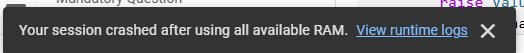

### Word2Vec

In [1]:
# Step 1: Import Necessary Libraries
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
import re
import pandas as pd

# Step 1: Load and preprocess the data
print("\nLoading dataset...")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 5731/Week 13/Amazon_Unlocked_Mobile.csv')

# Ensure the 'Reviews' column exists and has no missing values
if 'Reviews' not in df.columns:
    raise ValueError("'Reviews' column not found in the dataset!")
df = df.dropna(subset=['Reviews'])  # Drop rows with NaN in 'Reviews'

# Clean the reviews
print("\nPreprocessing reviews...")
df['Cleaned_Reviews'] = df['Reviews'].str.lower()  # Convert to lowercase
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # Remove special characters
tokenized_reviews = df['Cleaned_Reviews'].apply(lambda x: x.split())  # Tokenize the reviews



Loading dataset...

Preprocessing reviews...


In [2]:
# Step 2: Train Word2Vec model
print("\nTraining Word2Vec model...")
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4, sg=0)



Training Word2Vec model...


In [3]:
# Step 3: Generate feature vectors for clustering
print("\nGenerating feature vectors...")
def average_word_vectors(words, model, vector_size):
    """Compute the average word vectors for a list of words."""
    feature_vec = np.zeros((vector_size,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv.key_to_index:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec


Generating feature vectors...


In [4]:
# Apply the function to each review
vector_size = 100
review_vectors = np.array(
    [average_word_vectors(review, word2vec_model, vector_size) for review in tokenized_reviews]
)

In [5]:
# Step 4: Apply K-Means clustering
print("\nClustering reviews with K-Means...")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(review_vectors)

# Add cluster labels to the DataFrame
df['Word2Vec_Cluster'] = kmeans.labels_

# Display results
print("\nClustered Data Sample:")
print(df[['Reviews', 'Word2Vec_Cluster']].head())


Clustering reviews with K-Means...

Clustered Data Sample:
                                             Reviews  Word2Vec_Cluster
0  I feel so LUCKY to have found this used (phone...                 3
1  nice phone, nice up grade from my pantach revu...                 0
2                                       Very pleased                 1
3  It works good but it goes slow sometimes but i...                 0
4  Great phone to replace my lost phone. The only...                 3


### BERT

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the full dataset
print("\nLoading and preprocessing data...")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 5731/Week 13/Amazon_Unlocked_Mobile.csv')
df = df.dropna(subset=['Reviews'])

# Initialize BERT
print("\nInitializing BERT model...")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Generate BERT embeddings for the full dataset
def generate_bert_embeddings(texts, tokenizer, model, max_len=128):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for text in texts:
            # Tokenize the text
            inputs = tokenizer(
                text,
                return_tensors="pt",
                truncation=True,
                padding="max_length",
                max_length=max_len
            )
            input_ids = inputs["input_ids"].to(device)
            attention_mask = inputs["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            cls_embedding = outputs.last_hidden_state[:, 0, :]
            embeddings.append(cls_embedding.cpu().numpy())
    return torch.tensor(embeddings).squeeze(1)

print("\nGenerating BERT embeddings for all reviews...")
texts = df['Reviews'].tolist()  # Use the full dataset
bert_embeddings = generate_bert_embeddings(texts, tokenizer, model)
print(f"BERT Embeddings Shape: {bert_embeddings.shape}")

# Apply K-Means clustering
print("\nApplying K-Means clustering on BERT embeddings...")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(bert_embeddings)

# Add the cluster labels to the full DataFrame
df['BERT_KMeans_Cluster'] = kmeans.labels_

# # PCA for visualization (commented out due to large dataset size)
# print("\nReducing dimensions with PCA for visualization...")
# pca = PCA(n_components=2, random_state=42)
# pca_embeddings = pca.fit_transform(bert_embeddings)

print("\nPlotting the clusters...")
plt.figure(figsize=(10, 7))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=df['BERT_KMeans_Cluster'], cmap='viridis', s=10)
plt.title("BERT Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Display a sample of the clustered data
print("\nClustered Data Sample:")
print(df[['Reviews', 'BERT_KMeans_Cluster']].head())


Loading and preprocessing data...

Initializing BERT model...

Generating BERT embeddings for all reviews...


I'm going to submit the exercise while the BERT Model is running. I've run it four times, but the Google Colab environment keeps crashing and it takes a very long time to run. I believe the code would work in a more appropriate environment.

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

I've struggled to get my code to run in a timely manner which is required to compare my results. Instead, I will compare what I can see from Ms. Fengjiao's example and what I have read regarding these methods.

The clustering methods had different strengths and weaknesses. K-Means worked well and gave balanced clusters but required picking the number of clusters ahead of time. DBSCAN was good at finding outliers but needed careful parameter tuning. Hierarchical Clustering showed relationships between clusters nicely with a dendrogram but didn't scale well for large datasets. Word2Vec + K-Means grouped reviews based on word meanings, but some detail was lost when averaging word vectors. BERT created meaningful clusters but was slow and needed a lot of resources causing me to use a keyboard interrupt.

Each method had its own use depending on the situation. As with anything in life, there's a tradeoff for each method so you should understand each and know when to use them.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Overall I think these assignments have become more computationaly intensive than I imagined. We don't have access to the appropriate hardware to run this kind of
code. I spent two days running code and testing it just for question 1. My first BERT model would have taken 20+ hours to run.

We don't have access to GPUs on here and its not fair to require work without access to the required hardware to complete the assignment. You should grade the code,
not the output. The CPUs can't run the code.

Question (1) should be it's own exercise. It took an incredibly long time to work. I chose to train the model for 1 epoch per fold during 10-fold cross-validation
due to the computational cost of fine-tuning BERT. I chose to do this to balance time constraints while still allowing for an evaluation of model performance.
I also decided to use a keyboard interrupt because of how long it was taking. I ran it once that took over ten hours and lost my internet connection. I started over
but I didn't have enough time to run everything to a perfect standard.

Question (2)
Basically the same as question 1. My K-means ran for an hour before I stopped it the first time. Overall, it is taking too long to run the code on this hardware.
While I gained a deeper understanding for the models I'm still focused on how long it is taking to run the code. Maybe I can gain remote access to the lab in
the College of Information and try running some of these again.

'''